# 📊 Sales Method Analysis: Pens and Printers

This notebook analyzes three sales methods used in the launch of a new office stationery product line. The goal is to identify the most effective strategy by balancing revenue generation and team effort.


## ✅ Data Validation Summary

- Standardized `sales_method` values (e.g., 'em + call' → 'email + call').
- Dropped 1,074 rows with missing `revenue`.
- Capped `years_as_customer` values exceeding max possible (1984-founded).
- Final dataset: **13,926 rows**, **8 columns**, all cleaned.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid', palette='deep')

raw_data = pd.read_csv('../data/raw/product_sales.csv')
clean_data = raw_data.copy()
clean_data['sales_method'] = (
    clean_data['sales_method']
        .str.lower()
        .replace('em + call', 'email + call')
)

clean_data = clean_data.dropna(subset=['revenue']).reset_index(drop=True)
clean_data['years_as_customer'] = clean_data['years_as_customer'].apply(lambda x: min(x, datetime.now().year - 1984))
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13926 entries, 0 to 13925
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 870.5+ KB


## 📊 Exploratory Analysis

We explored revenue distribution, customer counts by sales method, and revenue patterns over time. Visuals help identify performance trends and variation across methods.


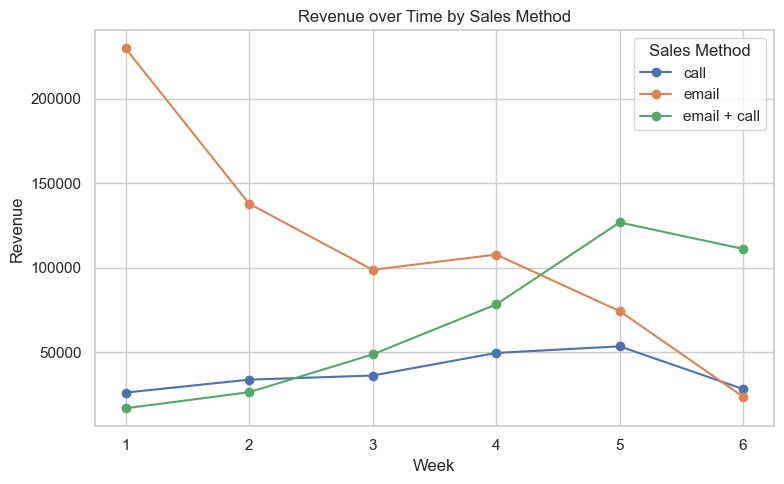

In [6]:
revenue_over_time = clean_data.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time.plot(marker='o', figsize=(8, 5))
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue over Time by Sales Method')
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()

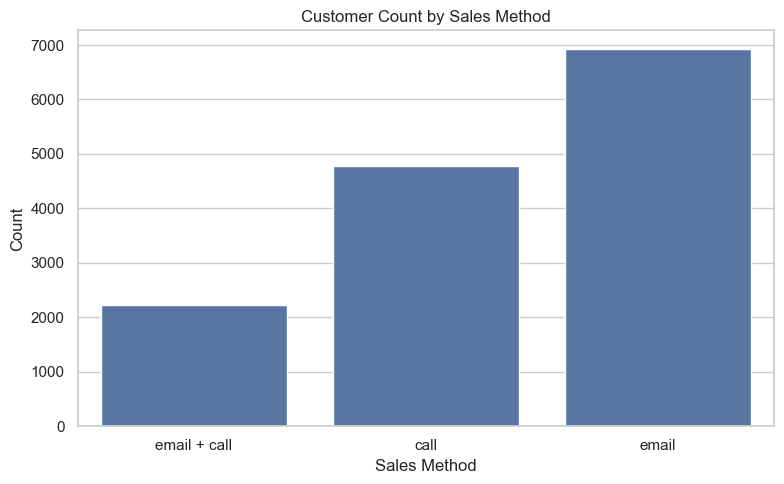

In [7]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=clean_data, x='sales_method')
plt.title('Customer Count by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Revenue by Sales Method')

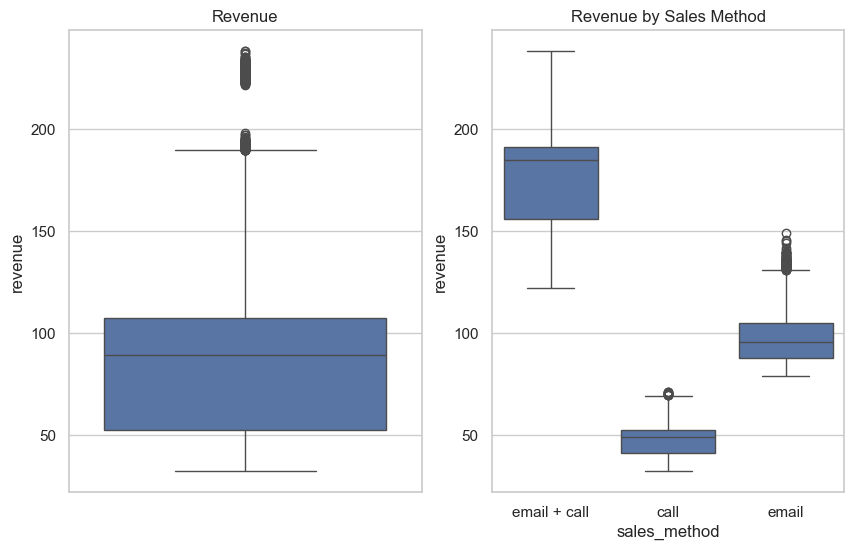

In [13]:
plt.figure(figsize=(10, 6))

# First subplot: revenue
plt.subplot(1, 2, 1)
sns.boxplot(data=clean_data, y='revenue')
plt.title('Revenue')

# Second subplot: revenue by sales_method
plt.subplot(1, 2, 2)
sns.boxplot(data=clean_data, x='sales_method', y='revenue')
plt.title('Revenue by Sales Method')

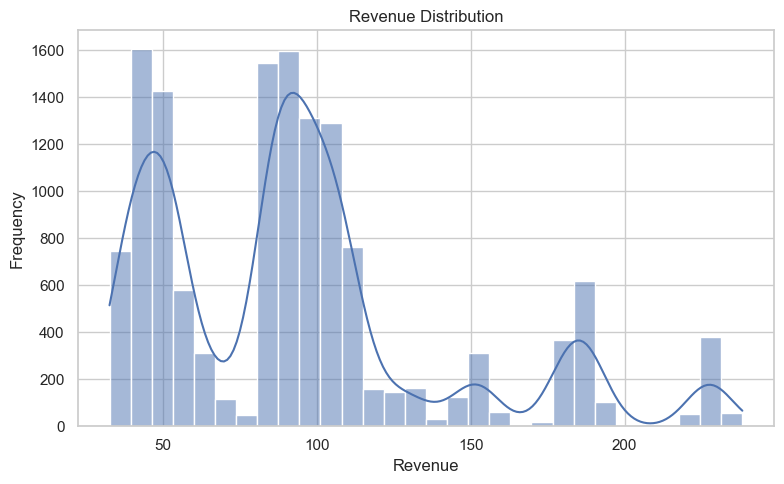

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_data['revenue'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 📈 Business Metric: Adjusted Revenue Efficiency (ARE)

ARE helps evaluate how much revenue each method generates per minute of team effort.

- Formula: `ARE = Revenue / Time per Customer`
- Time Map: Email = 5 min, Call = 30 min, Email + Call = 15 min


In [17]:
# Define estimated time spent per method (in minutes)
time_estimates = {
    'email': 5,
    'call': 30,
    'email + call': 15
}

# Apply time estimates
clean_data['time_spent'] = clean_data['sales_method'].str.lower().map(time_estimates)

# Calculate Adjusted Revenue Efficiency
clean_data['ARE'] = clean_data['revenue'] / clean_data['time_spent']

# Group and display mean ARE per method
are_summary = clean_data.groupby('sales_method')['ARE'].mean().sort_values(ascending=False)

# Create a presentation-ready summary table
are_df = clean_data.groupby('sales_method', as_index=False)['ARE'].mean()
are_df.columns = ['Sales Method', 'Average ARE (Revenue/Minute)']
are_df.sort_values(by='Average ARE (Revenue/Minute)', ascending=False, inplace=True)

are_df

,Sales Method,Average ARE (Revenue/Minute)
1,email,19.425537
2,email + call,12.243416
0,call,1.586582


### ✅ ARE Interpretation

The Adjusted Revenue Efficiency (ARE) metric revealed:
- **Email** had the highest ARE → most efficient use of time.
- **Email + Call** had moderate efficiency with good consistency.
- **Call-only** had the lowest ARE → resource-intensive with lower return.


## ✅ Conclusion and Recommendations

- Use **Email-only** as the default method for broad outreach.
- Apply **Email + Call** for high-potential leads to balance effort and return.
- Limit **Call-only** to strategic, high-value clients.
- Monitor ARE weekly as a performance KPI.

## 📎 Next Steps
- Investigate missing revenue records.
- Implement automated ARE tracking in CRM.
- Use this framework for future campaigns.
